In [29]:
# Imports
import warnings
warnings.filterwarnings('ignore')
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)


In [30]:
df_code = pd.read_excel('./data/code/codes.xlsx')
df_code = df_code[['quotation','codes']]

# Expandindo o DataFrame para repetir as citações para cada código
df_code_ajuste = df_code.assign(
    codes=df_code['codes'].str.split(', ')
).explode('codes', ignore_index=True)

df_code = df_code_ajuste


df_code

,quotation,codes
0,Constantemente variados: treinos distintos todos os dias,Treino Diversificado
1,"força, flexibilidade e resistência muscular e resistência aeróbica",Performance
2,velocidade e potência,Performance
3,nosso treino é constantemente variados,Treino Diversificado
4,desenvolver esse condicionamento físico,Saúde
...,...,...
58,uma atividade de alta intensidade no curto espaço de tempo,Performance
59,para o emagrecimento,Saúde
60,para o emagrecimento,Mudança na forma corporal
61,queima de gordura.,Mudança na forma corporal


In [31]:
# Caminho do diretório contendo os arquivos .txt
diretorio = './data/analise_ai'

# Lista para armazenar os dados
dados = []

# Iterar por todos os arquivos no diretório
for arquivo in os.listdir(diretorio):
    if arquivo.endswith('.txt'):  # Verificar se é um arquivo .txt
        caminho_completo = os.path.join(diretorio, arquivo)
        with open(caminho_completo, 'r', encoding='utf-8') as f:
            conteudo = f.read()  # Ler o conteúdo do arquivo
            dados.append({'file': arquivo, 'content': conteudo})

# Criar um DataFrame com os dados
df_trans = pd.DataFrame(dados)

# Exibir o DataFrame resultante
df_trans.head(1)

file  \
0  entrevista coach 2.txt   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [34]:
exemplos = ''
for i in range(len(df_code.to_dict('records'))):    
    exemplo = '<exemplo><trecho>'+df_code.to_dict('records')[i]['quotation']+'<trecho><code>'+df_code.to_dict('records')[i]['codes']+'</code></exemplo>'
    exemplos += '\n\t'+exemplo
    # print(df_code.to_dict('records')[i])
print(exemplos)


	<exemplo><trecho>Constantemente variados: treinos distintos todos os dias<trecho><code>Treino Diversificado</code></exemplo>
	<exemplo><trecho>força, flexibilidade e resistência muscular e resistência aeróbica<trecho><code>Performance</code></exemplo>
	<exemplo><trecho>velocidade e potência<trecho><code>Performance</code></exemplo>
	<exemplo><trecho>nosso treino é constantemente variados<trecho><code>Treino Diversificado</code></exemplo>
	<exemplo><trecho>desenvolver esse condicionamento físico<trecho><code>Saúde</code></exemplo>
	<exemplo><trecho>alta intensidade dentro da capacidade de cada indivíduo<trecho><code>Performance</code></exemplo>
	<exemplo><trecho>Nem todos são iguais<trecho><code>Diversidade de praticantes</code></exemplo>
	<exemplo><trecho>o aluno tenha de buscar essa alta intensidade<trecho><code>Performance</code></exemplo>
	<exemplo><trecho>o seu limite, tentando superar a cada treinamento<trecho><code>Treino Desafiador</code></exemplo>
	<exemplo><trecho>Os treinos

In [28]:
# import pprint

# # Define the function to process abstracts and display the prompt
# def query_llm(transcaicao):
#     # Formata o prompt
#     formatted_prompt = prompt_template.format(Transcricao=transcaicao)
    
#     # Imprime o prompt gerado com pprint
#     pp = pprint.PrettyPrinter(width=200, compact=False)
#     pp.pprint(formatted_prompt)
    
#     # Retorna um placeholder vazio para simular a execução sem erro
#     return {}

# def apply_llm(df_transcricao):
#     df_codificacao = pd.DataFrame()
#     for row in df_transcricao.values:
#         transcaicao = row[1]
#         # print(f"Arquivo: {row[0]}")
#         # Chama a função que agora apenas imprime o prompt
#         response_dict = query_llm(transcaicao)    
#         # Excluímos o processamento adicional, pois não há resposta real
#     return df_codificacao

# # Executa a função
# df_codificacao = apply_llm(df_trans)

In [ ]:
prompt_template = '''
Você é um agente de inteligência artificial especializado em códificação de texto utilizando os procedimento da pesquisadora Laurence Bardin.
Nesse contexto, a definição de codificação corresponde a uma transformação - efectuada segundo regras precisas - dos dados brutos do texto, transformação esta 
que, por recorte, agregação e enumeração, permite atingir uma representação do conteúdo, ou da sua expressão, 
susceptível de esclarecer o analista acerca das características do texto.

Considere a definição de codificação proposta por Laurence Bardin e os exemplos de códigos e trecho de textos previamente codificado, entre tags <exemplos>, utilizando o conceito de few-short.
<exemplos>'''+exemplos+'''
<exemplos>

Com base no contexto apresentado, realize uma codificação utilizando apenas os códigos dos exemplos para trechos similares e utilize a mesma lógica para codificar o que você 
considerar útil dentro da perspectiva de identificar as motiviações para a prática de Crossfit.
Percorra toda a informação continda no texto entre tags <transcricao> e retorne uma estutura em JSON com os trechos do texto na primeira coluna nomeada por "trecho" 
e o código correspondente na segunda coluna nomeada por "codigo".
<transcricao>
{Transcricao}
</transcricao>
'''
# Creation of the FewShotPromptTemplate
prompt = PromptTemplate.from_template(prompt_template)

openai_api_key = '<seu code app-openai>'  # Set your OpenAI API key
modelo = 'gpt-4o-mini'

# OpenAI model definition
llm_openai = ChatOpenAI(
    temperature=0.7,  # Default temperature for more varied and natural responses
    openai_api_key=openai_api_key, 
    model=modelo,
    top_p=1.0,        # Ensures full precision in sampling
    frequency_penalty=0.0,
    presence_penalty=0.0
)

llm_chain = prompt | llm_openai


# Define the function to process abstracts and apply the LLM
def query_llm(transcaicao):
    response = llm_chain.invoke(
        prompt.format(Transcricao=transcaicao)
    )    
    retorno = response.content.split('```')[1]
    json_data_cleaned = retorno.replace('json', '').strip()
    
    # Convert the JSON string to a Python dictionary
    response_dict = json.loads(json_data_cleaned)
    return response_dict

def apply_llm(df_transcricao):
    df_codificacao = pd.DataFrame()
    for row in df_transcricao.values:
        transcaicao = row[1]
        print(row[0])
        response_dict = query_llm(transcaicao)    
        print(response_dict)
        df_ret = pd.DataFrame(response_dict)
        df_ret['arquivo'] = row[0]
        df_codificacao = pd.concat([df_codificacao, df_ret], axis=0, ignore_index=True)
    return df_codificacao

df_codificacao = apply_llm(df_trans)
df_codificacao = df_codificacao[df_codificacao['codigo'] != '']

entrevista coach 2.txt
[{'trecho': 'O primeiro passo é fazer uma avaliação médica geral, tá?', 'codigo': 'Saúde'}, {'trecho': 'procurar pessoas que já passaram por isso, entendeu? Encontrar pessoas iguais a eles.', 'codigo': 'Diversidade de praticantes'}, {'trecho': 'O box é um termo potente que a gente usa para, para mostrar o ginásio.', 'codigo': 'Diversidade de praticantes'}, {'trecho': 'É lógico que o emagrecimento, ele leva um tempo para acontecer, mas a questão da disposição, na questão da pessoa estar mais acordada, isso é uma coisa imediata.', 'codigo': 'Mudança na forma corporal'}, {'trecho': 'imediata, um mês ele já está se sentindo melhor.', 'codigo': 'Saúde'}, {'trecho': 'Você tem que estar gostando daquilo que está fazendo.', 'codigo': 'Relações Sociais'}, {'trecho': 'Eu queria, é, trabalhar com uma coisa que me desse prazer.', 'codigo': 'Saúde'}, {'trecho': 'A ideia do cliente é melhorar sua força, melhorar sua resistência, melhorar sua capacidade cardiorrespiratória.', '

In [54]:
df_codificacao

,trecho,codigo,arquivo
44,"melhorar seu condicionamento físico treinando diversas habilidades físicas: flexibilidade, mobilidade, potência, velocidade, cardio respiratório",Saúde,entrevista coach 4.txt
45,"você, aquela pessoa que às vezes sofre para fazer aquela trilha lá no final de semana com seus amigos, você vai ficar melhor condicionado para se divertir no final de semana",Saúde,entrevista coach 4.txt
46,"você vai começar a querer se alimentar melhor, consequentemente isso vai te ajudar",Saúde,entrevista coach 4.txt
47,você vai encontrar diversos amigos aqui dentro da Perfect,Relações Sociais,entrevista coach 4.txt
48,"vai virar uma comunidade, você vai querer treinar todos os dias e se divertir com os amigos",Relações Sociais,entrevista coach 4.txt
...,...,...,...
150,"É sempre um treino diferente, sempre um desafio diferente, e isso motiva.",Treino Desafiador,entrevistado 4.txt
151,"É nisso que o CrossFit é diferente da musculação? Exatamente, não há um... não há um plano já, não é?",Treino Diversificado,entrevistado 4.txt
152,Cada dia é um novo desafio e cada dia é uma...,Treino Desafiador,entrevistado 4.txt
153,"Na musculação, depende se quiseres hipertrofiar tens que ter aquele tipo de treino, aqui não vais hipertrofiar, nós aqui queremos condição física geral, queremos melhorar a todos os níveis.",Saúde,entrevistado 5.txt


In [53]:
df_codificacao.to_excel('data/analise_openai.xlsx', index=False)

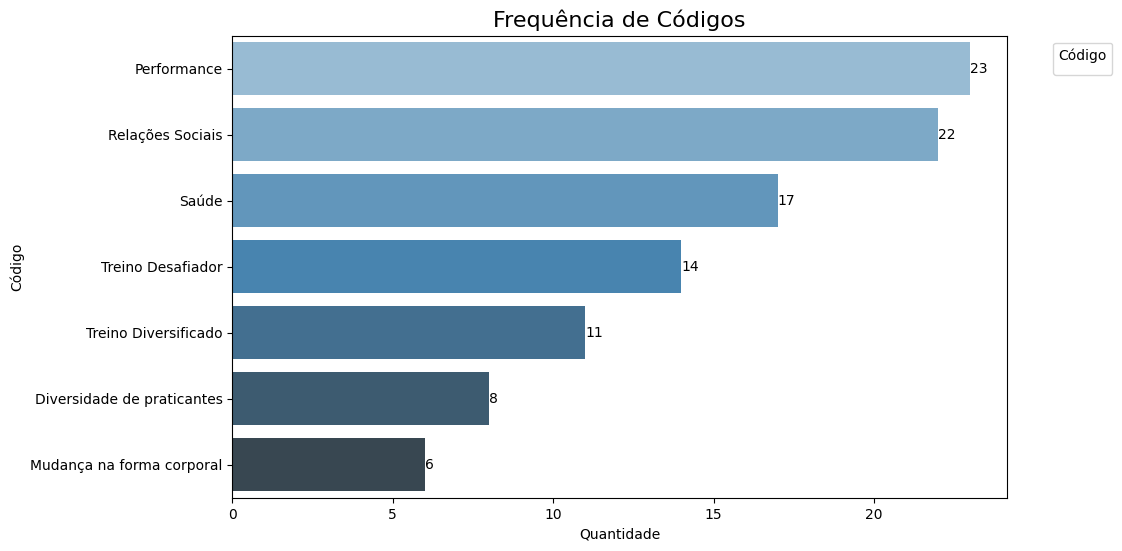

In [55]:
grouped_data = df_codificacao.groupby('codigo').size().reset_index(name='contagem')
grouped_data = grouped_data.sort_values(by='contagem', ascending=False)

# Criando o gráfico de barras com Seaborn
plt.figure(figsize=(10, 6))  # Ajustando o tamanho da figura
sns.barplot(x='contagem', y='codigo', data=grouped_data, palette='Blues_d')  # Usando a paleta Blues_d para tons de azul

# Adicionando os valores de contagem nas barras
for index, row in grouped_data.iterrows():
    plt.text(row['contagem'], row['codigo'], str(row['contagem']), color='black', ha='left', va='center')

# Personalizando a legenda
plt.legend(title='Código', bbox_to_anchor=(1.05, 1), loc='upper left')

# Personalizando os rótulos dos eixos
plt.xlabel('Quantidade')
plt.ylabel('Código')

plt.title('Frequência de Códigos', fontsize=16)
plt.show()